# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Alejandro De Santiago Palomares Salinas  
**Date:** 09/11/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [2]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-version3-Aledesan-utsa/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [3]:
# Import the messy sales dataset
messy_sales <- read_csv("/workspaces/assignment-2-version3-Aledesan-utsa/data/messy_sales_data.csv")

cat("Column names: ", paste(colnames(messy_sales), collapse = ", "), "\n")
print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Column names:  TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity 
[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [4]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [11]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values]
Customer name and Purchase Date seem to have some missing entries on the first row.

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]
On the sales amount column, row 4 there is a value that is very extreme compared to others, showing a 5000 value 
compared to the others that lie in the hundreds. Also in the Quantity column, row 5, 3, and 7, 
there is an abnormal number of items placed, with a value of 100, -1, and 0 respectively.

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]
On row 10, the e in Electronics is lowercase, while in other rows it is uppercase is in lowercase 
compared to the other categories with the same name.

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?] 
Yes, they both are in the appropriate formats. However, the rounding for the sales amount column is very large, 
with 4 decimal places, which can be misleading and confusing when doing the calculations.

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]
Yes, as mentioned previously, in the Quantity column, row 3 has a -1 value, which is not possible.
**YOUR OBSERVATIONS:**

[Write your detailed observations here after running the code above]
Overall, the dataset is pretty complete, however, we do notice that there are some abnormal values, and a couple of NA 
values mentioned previously. These can complicate the analysis and require us to do a more thorough data cleaning process before processing it.

ERROR: Error in parse(text = input): <text>:1:1: unexpected '^'
1: **
    ^


---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [5]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x)))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ] 

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [5]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

ERROR: Error in parse(text = input): <text>:2:2: unexpected ','
1: "#### 2.2 Missing Value Treatment - Option A (Removal)
2: ",
    ^


In [6]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales) 
print("Data after removing NA rows:")
print(sales_removed_na)# YOUR CODE HERE

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Data after removing NA rows:"
# A tibble: 156 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             2 Alice Brown   Clothing                 573. 2023-10-21   
 2             3 Jane Doe      Electronics              488. 2023-12-28   
 3             4 Jane Doe      Electronics             5000  2023-06-16   
 4             5 John Smith    Books                    344. 2023-05-05   
 5             6 John Smith    Books                    435. 2023-11-28   
 6             7 Jane Doe      Home                     489. 2023-08-17   
 7             8 Jane Doe      Electronics              537. 2023-05-17   
 8             9 Jane Doe      Clothing                 793. 2023-08-13   
 9            10 Jane Doe      electronics              649. 2023-10-16   
10            11 Bob Johnson   ELECTRONICS              596. 2023-10-20   
# ℹ 146 more rows
# ℹ 1 more variable: Quanti

#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [7]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [8]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniq_vals <- unique(v)
  tab_vals <- tabulate(match(v, uniq_vals))
  return(uniq_vals[which.max(tab_vals)])
}

categorical_var <- c("Product_Category", "Customer_Name")

categories_imputed <- messy_sales %>%
  mutate(across(all_of(categorical_var), 
                ~ifelse(is.na(.), 
                       get_mode(.[!is.na(.)]), 
                       .)))
for(col in categorical_var) {
print("Missing values after imputation:")
print(colSums(is.na(categories_imputed)))
}

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [9]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
messy_sales$Customer_Name
  get_mode <- function(v) {
  uniqv <- unique(v) 
  uniqv[which.max(tabulate(match(v, uniqv)))] 
}
customer_mode <- get_mode(messy_sales$Customer_Name[!is.na(messy_sales$Customer_Name)])

sales_imputed <- sales_imputed %>%
  mutate(Customer_Name = ifelse(
    is.na(Customer_Name),
    customer_mode,
    Customer_Name
  ))
print("Data after mode imputation for Customer_Name:")

[1] NA            "Alice Brown" "Jane Doe"    "Jane Doe"    "John Smith" 
  [6] "John Smith"  "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [11] "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown" "John Smith" 
 [16] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "Jane Doe"   
 [21] NA            "Bob Johnson" "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [26] NA            "Alice Brown" "Jane Doe"    "Alice Brown" "Alice Brown"
 [31] "Jane Doe"    "John Smith"  "Bob Johnson" "Alice Brown" "John Smith" 
 [36] "Jane Doe"    "Bob Johnson" "Bob Johnson" "John Smith"  "Alice Brown"
 [41] NA            "Alice Brown" "Bob Johnson" "John Smith"  "Jane Doe"   
 [46] "John Smith"  "John Smith"  "Alice Brown" "John Smith"  "Jane Doe"   
 [51] NA            "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown"
 [56] "Bob Johnson" "John Smith"  "Bob Johnson" "Bob Johnson" "Jane Doe"   
 [61] NA            "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
 [66] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "John Smith" 
 [71] "Bob Johnson" "Jane Doe"    "Alice Brown" "Jane Doe"    "Alice Brown"
 [76] NA            "John Smith"  "John Smith"  "Bob Johnson" "Jane Doe"   
 [81] NA            "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith" 
 [86] "Jane Doe"    "Alice Brown" "John Smith"  "Bob Johnson" "Alice Brown"
 [91] "Alice Brown" "Bob Johnson" "Jane Doe"    "Alice Brown" "John Smith" 
 [96] "John Smith"  "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown"
[101] NA            "Bob Johnson" "Bob Johnson" "Bob Johnson" "Jane Doe"   
[106] "John Smith"  "John Smith"  "Jane Doe"    "John Smith"  "Alice Brown"
[111] "Jane Doe"    "Bob Johnson" "Jane Doe"    "Alice Brown" "Bob Johnson"
[116] "Bob Johnson" "John Smith"  "John Smith"  "John Smith"  "John Smith" 
[121] NA            "Alice Brown" "Alice Brown" "Alice Brown" "John Smith" 
[126] NA            "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
[131] "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith"  "John Smith" 
[136] "Bob Johnson" "Alice Brown" "Alice Brown" "Bob Johnson" "Jane Doe"   
[141] NA            "Bob Johnson" "Jane Doe"    "John Smith"  "John Smith" 
[146] "John Smith"  "Bob Johnson" "Alice Brown" "Alice Brown" "Alice Brown"
[151] NA            "Bob Johnson" "Bob Johnson" "Bob Johnson" "Bob Johnson"
[156] "Alice Brown" "Alice Brown" "Alice Brown" "Jane Doe"    "John Smith" 
[161] NA            "Bob Johnson" "Alice Brown" "Jane Doe"    "John Smith" 
[166] "John Smith"  "Bob Johnson" "John Smith"  "Alice Brown" "Bob Johnson"
[171] "John Smith"  "John Smith"  "Jane Doe"    "Alice Brown" "Jane Doe"   
[176] NA            "Jane Doe"    "Bob Johnson" "Bob Johnson" "Jane Doe"   
[181] NA            "Alice Brown" "Jane Doe"    "Bob Johnson" "Bob Johnson"
[186] "John Smith"  "Bob Johnson" "Bob Johnson" "John Smith"  "John Smith" 
[191] "Alice Brown" "Alice Brown" "Bob Johnson" "Alice Brown" "Jane Doe"   
[196] "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"    "John Smith"

[1] "Data after mode imputation for Customer_Name:"


In [10]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
quantity_median <- messy_sales %>%
  mutate(quantity_imputed_median = ifelse(is.na(Quantity), # If Profit is NA...
                                      median(Quantity, na.rm = TRUE), # Replace with median (excluding NAs)
                                      Quantity)) # Otherwise keep original value
print("Data after median imputation for Quantity:")
print(quantity_median)

[1] "Data after median imputation for Quantity:"
# A tibble: 200 × 7
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
# ℹ 190 more rows
# ℹ 2 more va

In [11]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.
The median and mode strategies, although they may look similar are both very different. The median approach is not very accurate since it is choosing the
middle value of the data set, which can be very misleading if there are outliers in the data set. The mode approach is more accurate since it is 
choosing the most frequent value in the data set, which is more representative of the data set as a whole but can still be heavilty affected by outliers.
However, both approaches can lead to loss of variability in the data set, which can be problematic for certain types of analysis. 
Overall, the mode approach is generally better for categorical data, while the median approach is preferred for numerical data with outliers.

In [12]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [13]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [14]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

I personally think that removal is the best choice since it is all factual and real numbers, with imputation we are just guessing what the value could be. If we remove the rows with missing values, we are only working with complete data which is more accurate. However, if the amount of missing data is too high, we might lose a lot of useful information. We can work with small data sets, but we cannot work with inaccurate data.


2. **What are the trade-offs between removal and imputation?**

With removal, we get a smaller data set but it tends to be more accurate since we are only working with complete data. However, we lose a lot of data that could be useful for analysis. With imputation, we retain all the data but we introduce some uncertainty since we are filling in missing values with estimates. This can lead to biased results if the imputation method is not appropriate for the data.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [15]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(messy_sales$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(messy_sales$Sales_Amount, 0.75, na.rm = TRUE)  
IQR_sales <- Q3_sales - Q1_sales 

In [16]:
### TODO: Calculate outlier thresholds
outlier_threshold_upper_sales_amount <- Q3_sales + 1.5 * IQR_sales
outlier_threshold_lower_sales_amount <- Q1_sales - 1.5 * IQR_sales

In [17]:
### TODO: Identify outliers
outliers <- messy_sales %>%
  filter(Sales_Amount > outlier_threshold_upper_sales_amount | Sales_Amount < outlier_threshold_lower_sales_amount)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", outlier_threshold_lower_sales_amount))
print(paste("Upper threshold:", outlier_threshold_upper_sales_amount))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 Bob Johnson   Electronics            100000 2023-09-18   
6           177 Jane Doe      ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


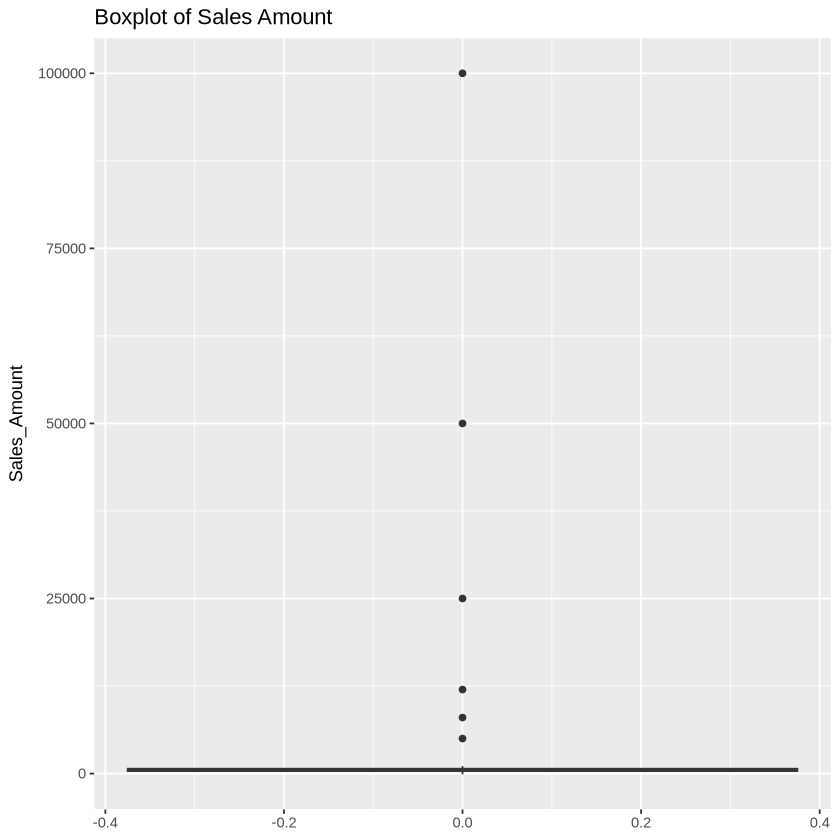

In [18]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(messy_sales, aes(y = Sales_Amount)) + 
    geom_boxplot(outliers = ) + # Create boxplot (shows median, quartiles, and outliers)
    ggtitle("Boxplot of Sales Amount") # Add title
# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [19]:
sales_outliers_removed <- messy_sales %>%
    filter(Sales_Amount <= outlier_threshold_upper_sales_amount & Sales_Amount >= outlier_threshold_lower_sales_amount)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [20]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- messy_sales %>%
  mutate(Sales_capped = ifelse(Sales_Amount > outlier_threshold_upper_sales_amount,
                              outlier_threshold_upper_sales_amount,
                              ifelse(Sales_Amount < outlier_threshold_lower_sales_amount,
                                    outlier_threshold_lower_sales_amount,
                                    Sales_Amount)))
print("Data after capping Sales outliers:")
print(sales_outliers_removed)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Data after capping Sales outliers:"
# A tibble: 200 × 7
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
# ℹ 190 more rows
# ℹ 2 more variables:

In [21]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [23]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount > outlier_threshold_upper_sales_amount,
                                            outlier_threshold_upper_sales_amount, 
                                            ifelse(sales_outliers_capped$Sales_Amount < outlier_threshold_lower_sales_amount, 
                                                  outlier_threshold_lower_sales_amount, 
                                                  sales_outliers_capped$Sales_Amount)) 
### Hint: Use ifelse() to replace values above/below thresholds

In [24]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [26]:
### Check for remaining outliers
remaining_outliers <- remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount > outlier_threshold_upper_sales_amount | 
         Sales_Amount < outlier_threshold_lower_sales_amount)

print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"
[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [27]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped # Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I chose the dataset with outliers capped because it gives us the most complete data set while still taking care of the outliers. We are not losing ant data, and we are minimizing the impact of the outliers on our analysis.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [28]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             36
3   Mean Sales_Amount        1614.91          531.5
4 Median Sales_Amount         531.29         531.29
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

In a business scenario, I would prefer imputing missing values when dealing with large datasets because imputing gives us a "close" estimate of what the missing value could be, allowing us to use the full dataset for analysis.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

They should be treated since they could represent important business events like large sales or errors in data entry. Removing them could lead to loss of valuable information, while treating them (ex capping) allows us to minimize their impact without losing the data entirely.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

Outliers may skew our data towards higher or lower values, leading to inaccurate averages and misleading insights of our overall sales, average prices, production quantities, etc. Missing values can reduce the sample size, which may affect the reliability of statistical analyses and forecasts. Both issues can lead to poor decision-making if not properly taken care of.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Removing or modifying data can lead to biased results if not done carefully. Analysts should document all changes made during the cleaning process, including the reasons for removing or modifying data, and also an explanation of such. Transparency can be maintained by providing clear explanations of the methods used and their potential impact on the analysis. Additionally, involving stakeholders in the decision-making process can help ensure that ethical considerations are addressed beforehand.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**